In [1]:
%%HTML
<style>
body {
    --vscode-font-family : 'Nasalization';
}

.dataframe {
    font-family : 'Century Gothic';
    border : 2px solid #252422;
    border-radius : 5px;
    overflow : hidden;
}

.dataframe tr th {
    text-align : center;
}

.dataframe td {
    paddign : 10px;
    text-align : left;
}

.dataframe tr:hover{
    background-color : #ef233c;
}

</style>

# 🚢 Importation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_airline

df_score = pd.read_csv('./score.csv', sep=';')
df_titanic = sns.load_dataset('titanic')

# 🎯 Main

## 📌 Titanic population repartition

In [3]:
df_titanic_age = df_titanic.copy()

df_titanic_age = df_titanic_age[['age', 'who']]
df_titanic_age = df_titanic_age.dropna()
df_titanic_age['age'] = df_titanic_age['age'].astype('int16')

df_titanic_age = pd.DataFrame(df_titanic_age.value_counts()).reset_index()
df_titanic_age = df_titanic_age.sort_values(['age', 'who'])

df_titanic_age = df_titanic_age.pivot_table(columns='who', index='age', values='count')
df_titanic_age = df_titanic_age.fillna(0)

df_titanic_age

who,child,man,woman
age,,,
0,7.0,0.0,0.0
1,7.0,0.0,0.0
2,10.0,0.0,0.0
3,6.0,0.0,0.0
4,10.0,0.0,0.0
...,...,...,...
66,0.0,1.0,0.0
70,0.0,3.0,0.0
71,0.0,2.0,0.0


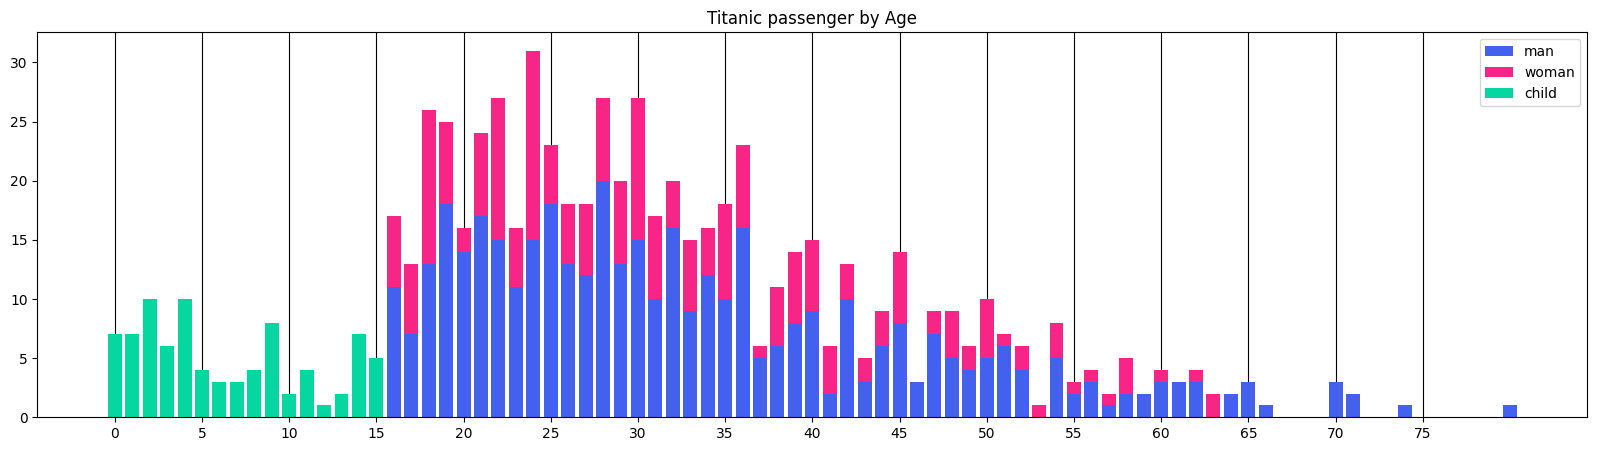

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

colors = {
    'child' : '#06d6a0',
    'woman' : '#f72585',
    'man'   : '#4361ee',
}

bar_child = ax.bar(
    df_titanic_age.index,
    df_titanic_age['child'],
    color = colors['child'],
    label = 'child'
)

bar_woman = ax.bar(
    df_titanic_age.index,
    df_titanic_age['woman'],
    color = colors['woman'],
    label = 'woman',
    bottom=df_titanic_age['man']
)

bar_man = ax.bar(
    df_titanic_age.index,
    df_titanic_age['man'],
    color = colors['man'],
    label = 'man'
)

# Axis settings

ax.set(xticks=np.arange(0, df_titanic_age.index.max(), 5))
ax.grid(axis='x', color = '#000000')
ax.set_axisbelow(True)

# Legend

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Title

plt.title('Titanic passenger by Age')

plt.show()

## 📌 Progress bar

In [5]:
df_score['name'] = df_score['first_name'] + ' ' + df_score['last_name']
df_score['target_reached'] = np.where(df_score['score'] >= df_score['target'], 'YES', 'NO')
df_score['difference'] = df_score['target'] - df_score['score']

df_score['below'] = np.where(df_score['target_reached'] == 'YES', df_score['target'], df_score['score'])
df_score['above'] = np.abs(df_score['difference'])

df_score['above_bar_color'] = np.where(df_score['target_reached'] == 'YES', '#f72585', '#fca311')
df_score = df_score.sort_values('target', ascending=False)

df_score.head(5)

,first_name,last_name,target,score,name,target_reached,difference,below,above,above_bar_color
4,Gillian,Cohen,99,87,Gillian Cohen,NO,12,87,12,#fca311
15,Hall,Spears,94,29,Hall Spears,NO,65,29,65,#fca311
13,Eric,Reilly,93,46,Eric Reilly,NO,47,46,47,#fca311
9,Daphne,Shaffer,91,44,Daphne Shaffer,NO,47,44,47,#fca311
7,Brynn,Hammond,87,16,Brynn Hammond,NO,71,16,71,#fca311


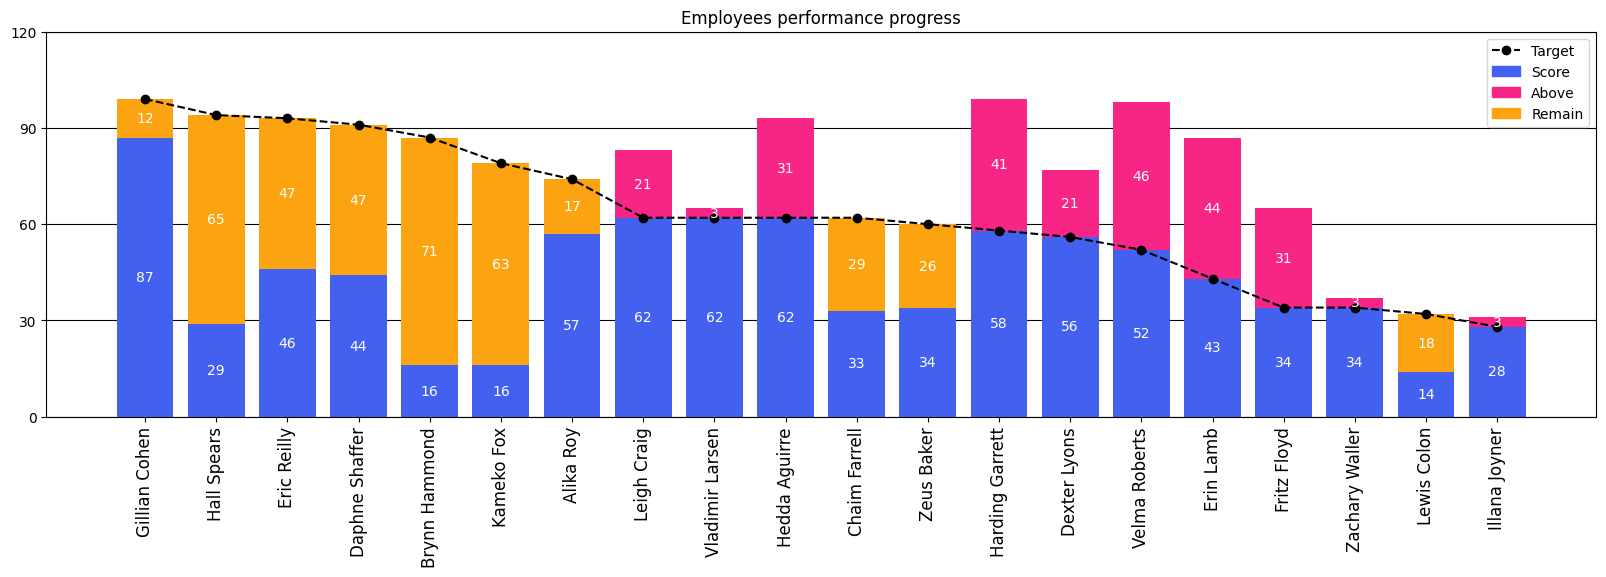

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))

# Line plot
ax.plot(df_score['name'], df_score['target'], linestyle='--', marker='o', color='#000000', label='Target')

# Above bar
p_above_bar = ax.bar(df_score['name'], df_score['above'], bottom=df_score['below'], color=df_score['above_bar_color'])
ax.bar_label(p_above_bar, label_type='center', color='#FFFFFF')

# Below
p_below_bar = ax.bar(df_score['name'], df_score['below'], color='#4361ee')
ax.bar_label(p_below_bar, label_type='center', color='#FFFFFF')

# Plot settings
plt.xticks(rotation=90, size=12)
ax.set(yticks=np.arange(0, df_score['target'].max() + 40, 30))
ax.grid(axis='y', color='#000000')
ax.set_axisbelow(True)

# Legend
blue_bar = mpatches.Patch(color='#4361ee', label='Score')
pink_bar = mpatches.Patch(color='#f72585', label='Above')
yellow_bar = mpatches.Patch(color='#fca311', label='Remain')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles + [blue_bar, pink_bar, yellow_bar])

plt.title('Employees performance progress')
plt.show()

## 📌 Line plot

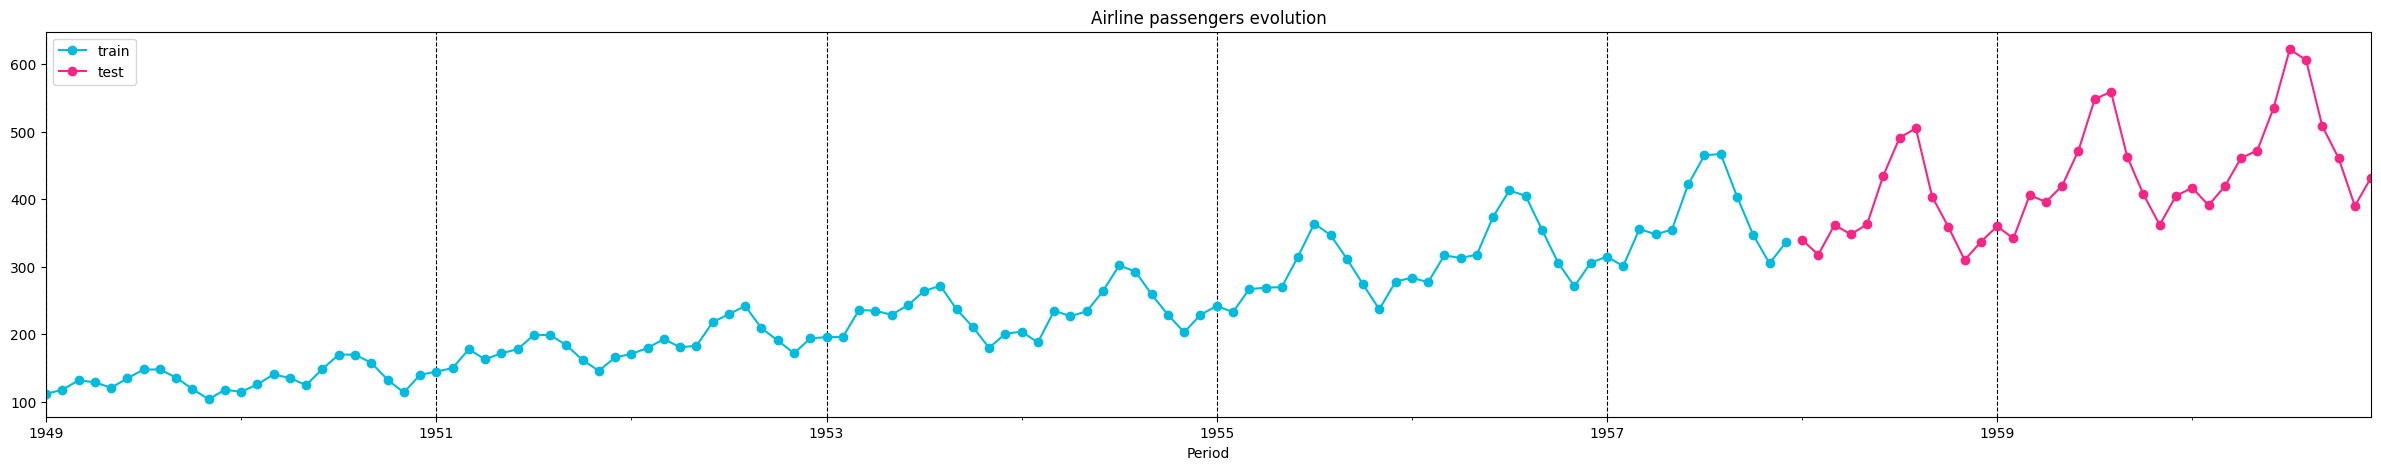

In [56]:
df_airline = pd.DataFrame(load_airline())
years = df_airline.index.year.unique()

train_size = 0.8
test_year = years[int(years.size * train_size)]

train = df_airline[df_airline.index < test_year.astype('str')]
test = df_airline[df_airline.index >= test_year.astype('str')]

fig, ax = plt.subplots(figsize=(30, 5))

train.plot(ax = ax, color='#00BBDD', marker='o', label='train')
test.plot(ax=ax, color='#f72585', marker='o', label='test')

ax.legend(['train', 'test'])
ax.grid(axis='x', color = '#000000', ls='--')
ax.set_axisbelow(True)


plt.title('Airline passengers evolution')
plt.show()



## 📌 Pairplot

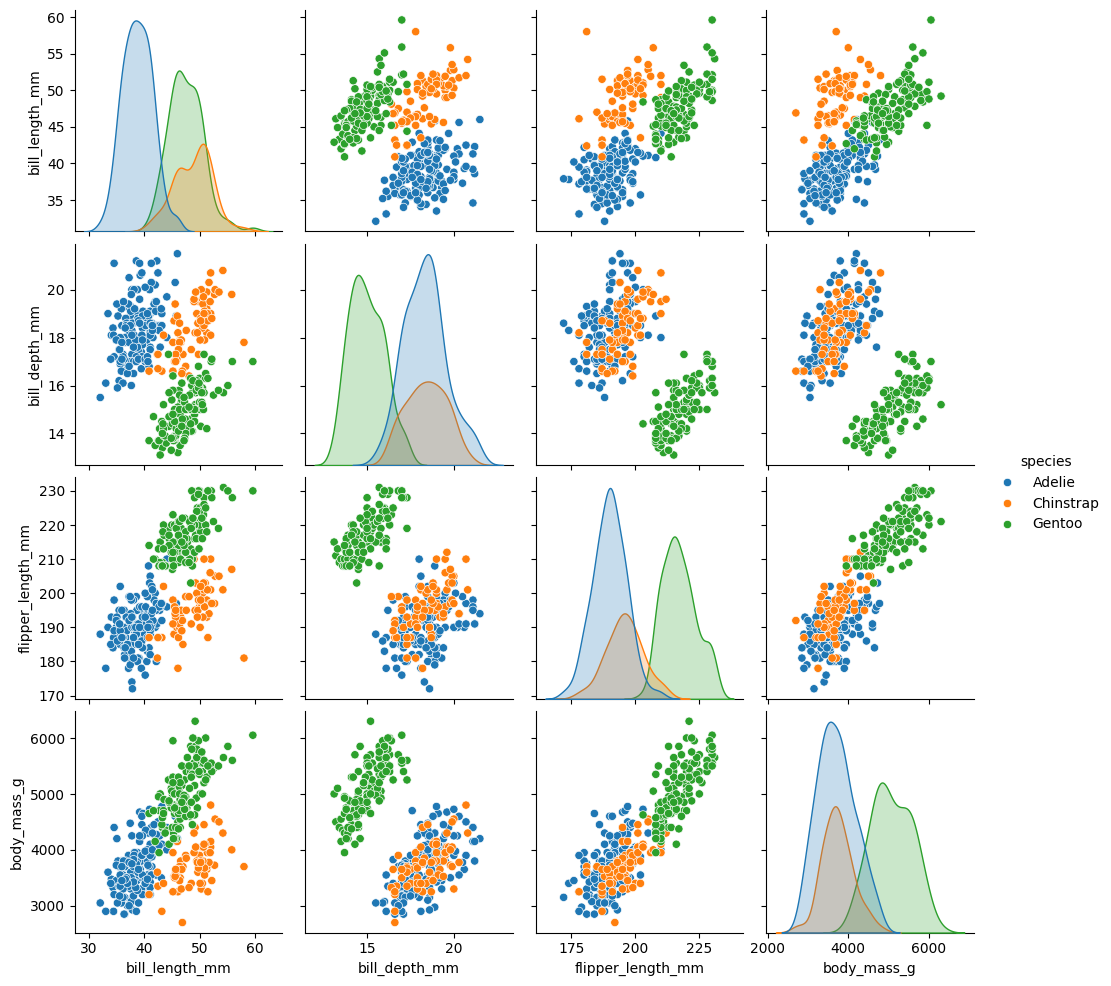

In [7]:
df_penguins = sns.load_dataset('penguins')
sns.pairplot(data=df_penguins, hue='species')